In [1]:
%matplotlib inline
import numpy as np 
from falass import readwrite, job, sld, reflect, compare

ModuleNotFoundError: No module named 'falass'

# ISIS Neutron Training Course
## MD-based analysis of neutron reflectometry

#### Andrew R. McCluskey 
##### University of Bath/Diamond Light Source - arm61@bath.ac.uk

2018-03-08

In this exercise, you will analyse neutron reflectometry data using a molecular dynamics simulation. The system that was studied is a DSPC monolayer, with five contrasts being measured:

- d$_{83}$-DSPC in ACMW
- d$_{70}$-DSPC in ACMW
- d$_{83}$-DSPC in D$_2$O
- d$_{70}$-DSPC in D$_2$O
- h-DSPC in D$_2$O

The aim of this exercise is to understand how reflectometry experiments can be analysed using molecular dynamics simulation, and putting this into action by identifying the comparing two simulations at different areas per molecule to identify which matches more closely with the experimental data. This will involve using the python package falass.[1] falass is capable of reading in molecular dynamics simulation trajectory (e.g. the atomic positions at a series of simulation timesteps) and returning a reflectometry profile. Full documentation for falass is available at https://readthedocs.org/projects/falass/.

The first thing to do with falass is to read in the experimental data, these files are all in the 'data' directory, and can be read in with the 

```
readwrite.Files(datfile='filepath')
```

command. 

In [24]:
files_d83acmw = readwrite.Files(datfile='data/d83acmw.dat')
files_d70acmw = readwrite.Files(datfile='data/d70acmw.dat')
files_d83d2o = readwrite.Files(datfile='data/d83d2o.dat') 
files_d70d2o = readwrite.Files(datfile='data/d70d2o.dat')
files_hd2o = readwrite.Files(datfile='data/hd2o.dat')

These .dat files are three column comma separated files consisting of information about q, reflected intensity and an uncertainty in reflected intensity.

In [25]:
cat data/d83acmw.dat

0.051793 0.00034985 5.0354e-06
0.054383 0.00031165 4.2426e-06
0.057102 0.00028761 3.6729e-06
0.059957 0.00024688 3.0832e-06
0.062955 0.00021509 2.6625e-06
0.066103 0.00019243 2.3042e-06
0.069408 0.00016831 2.0471e-06
0.072878 0.00014882 1.8137e-06
0.076522 0.00013023 1.5953e-06
0.080348 0.00010985 1.413e-06
0.084365 9.301e-05 1.233e-06
0.088584 7.9305e-05 1.0706e-06
0.093013 6.7076e-05 9.3772e-07
0.097664 5.8056e-05 8.355e-07
0.10255 4.7308e-05 7.2453e-07
0.10767 3.983e-05 6.4247e-07
0.11306 3.2151e-05 5.6431e-07
0.11871 2.7395e-05 5.1552e-07
0.12465 2.1987e-05 4.4466e-07
0.13088 1.8585e-05 4.0611e-07
0.13742 1.4942e-05 3.7729e-07
0.14429 1.1456e-05 3.3753e-07
0.15151 9.3753e-06 3.1949e-07
0.15908 6.2979e-06 2.7863e-07
0.16704 5.5088e-06 1.6133e-06
0.17539 4.2825e-06 1.2664e-06
0.18416 3.4385e-06 1.012e-06
0.19337 2.6153e-06 3.151e-07
0.20304 2.2895e-06 5.691e-07
0.21319 1.6778e-06 1.264e-07
0.22385 1.5736e-06 1.999e-07
0.23504 1.7357e-06 3.884e-07
0.24679 1.7277e-06 5.944e-07
0.25913 

The above command simply defined the datfile in the files class, these now must be read into computer memory.

In [26]:
files_d70acmw.read_dat()
files_d83acmw.read_dat()
files_d70d2o.read_dat()
files_d83d2o.read_dat()
files_hd2o.read_dat()

Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]
Reading DAT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]


We can also plot this data to check that the right files have been read in. 

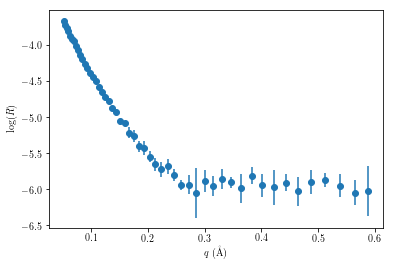

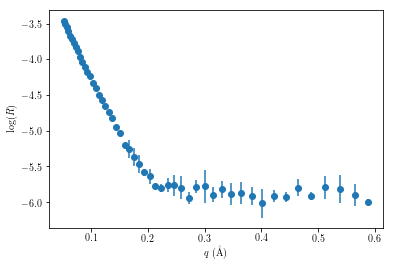

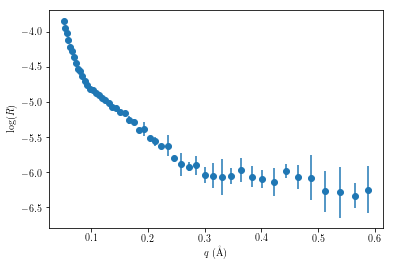

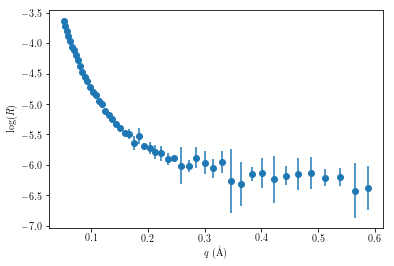

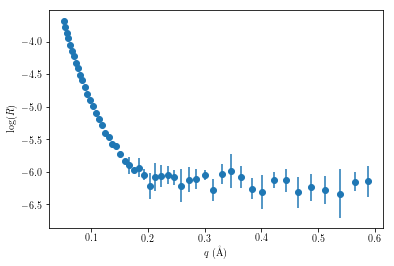

In [27]:
d70acmw_data = files_d70acmw.plot_dat(rq4=False)
d70acmw_data.show()
d83acmw_data = files_d83acmw.plot_dat(rq4=False)
d83acmw_data.show()
d70d2o_data = files_d70d2o.plot_dat(rq4=False)
d70d2o_data.show()
d83d2o_data = files_d83d2o.plot_dat(rq4=False)
d83d2o_data.show()
hd2o_data = files_hd2o.plot_dat(rq4=False)
hd2o_data.show()

In [18]:
files_d13acmw.lgtfile = 'data/d13acmw.lgt'

In [19]:
files_d13acmw.read_lgt()

Reading LGT file 

[ 0 % ]
[# 10 % ]
[## 20 % ]
[### 30 % ]
[#### 40 % ]
[##### 50 % ]
[###### 60 % ]
[####### 70 % ]
[######## 80 % ]
[######### 90 % ]
[########## 100 % ]


[1] *falass*, Andrew R. McCluskey, (http://people.bath.ac.uk/arm61/falass/)

In [52]:
a = np.tan(10/500)
b = np.rad2deg(a)
print(b)

1.14606840346
